In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# mouse_drug_data_to_load = pd.csv_read("data/mouse_drug_data.csv")
# clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_dataframe = pd.read_csv("data/mouse_drug_data.csv")
trial_dataframe = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_dataframe
trial_dataframe

# Combine the data into a single dataset
sarcoma_data=pd.merge(mouse_dataframe,trial_dataframe,on = "Mouse ID")


# Display the data table for preview

sarcoma_data
sarcoma_data.count()

Mouse ID              1906
Drug                  1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
dtype: int64

In [16]:
sarcoma_data.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

In [17]:
## Tumor Response to Treatment
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

print('"Tumor response to Treatment"')
sarcoma_data.groupby("Drug")["Timepoint"].count()
tumor_response = sarcoma_data.groupby(["Drug", "Timepoint"])
tumor_dataframe = tumor_response["Tumor Volume (mm3)"].mean().to_frame()
tumor_dataframe.head()

"Tumor response to Treatment"


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [19]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

tumor_response_error = sarcoma_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_dataframe = tumor_response_error.to_frame()
tumor_dataframe.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [20]:
tumor_dataframe.columns

Index(['Tumor Volume (mm3)'], dtype='object')

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

tumor_plot_pre = tumor_dataframe.unstack(0)
tumor_plot_dataframe = tumor_plot_pre["Tumor Volume (mm3)"]
tumor_plot_dataframe.head()

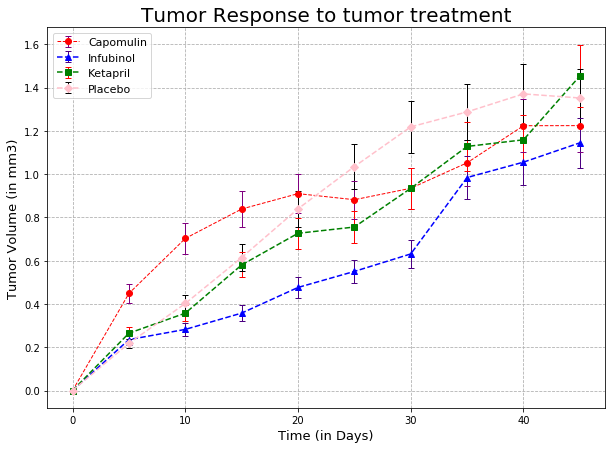

<Figure size 432x288 with 0 Axes>

In [65]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))
#plt.plot(x_axis, tumor_plot_dataframe["Capomulin"])
    
error = tumor_dataframe["Tumor Volume (mm3)"]["Capomulin"]
cap=plt.errorbar(x_axis, tumor_plot_dataframe["Capomulin"], yerr=error/10,
                   fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red",ecolor="purple")
                

error = tumor_dataframe["Tumor Volume (mm3)"]["Infubinol"]
infu=plt.errorbar(x_axis, tumor_plot_dataframe["Infubinol"], yerr=error/10, 
                    fmt="^", ls="dashed", elinewidth=1, alpha=1, capsize=3,color ="blue",ecolor="indigo")

error = tumor_dataframe["Tumor Volume (mm3)"]["Ketapril"]
keta=plt.errorbar(x_axis, tumor_plot_dataframe["Ketapril"], yerr=error/10, 
                    fmt="s", ls="dashed", elinewidth=1, alpha=1, capsize=3,color = "green",ecolor="red")


error = tumor_dataframe["Tumor Volume (mm3)"]["Placebo"]
plac=plt.errorbar(x_axis, tumor_plot_dataframe["Placebo"], yerr=error/10,
                    fmt="D", ls="dashed", elinewidth=1, alpha=1, capsize=3,color="pink",ecolor = "black")

plt.title("Tumor Response to tumor treatment", fontsize=20)
plt.xlabel("Time (in Days)", fontsize=13)
plt.ylabel("Tumor Volume (in mm3)", fontsize=13)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril",
                                     "Placebo"), fontsize=11)
plt.show()
# Save the Figure
plt.savefig("errorbar.png")


In [ ]:
## Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

sarcoma_data.groupby("Drug")["Timepoint"].count()
meta_response = sarcoma_data.groupby(["Drug", "Timepoint"])
meta_dataframe = meta_response["Metastatic Sites"].mean().to_frame()
meta_dataframe.head()

In [60]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

meta_response_error = sarcoma_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
mre_dataframe = meta_response_error.to_frame()
mre_dataframe.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [61]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked

meta_plot_pre = meta_dataframe.unstack(0)
meta_plot_dataframe = meta_plot_pre["Metastatic Sites"]
meta_plot_dataframe.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [63]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7))
#plt.plot(x_axis, tumor_plot_dataframe["Capomulin"])
    
error = mre_dataframe["Metastatic Sites"]["Ceftamin"]
cap=plt.errorbar(x_axis, mre_dataframe["Ceftamin"], yerr=error/10,
                   fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red",ecolor="purple")
plt.show()

KeyError: 'Ceftamin'

<Figure size 720x504 with 0 Axes>

In [57]:
x_axis = [0,5,10,15,20,25,30,35,40,45]
plt.figure(figsize=(10,7)
error = mre_dataframe["Metastatic Sites"]["Capomulin"]
cap = plt.errorbar(x_axis, mre_dataframe["Capomulin"], yerr=error/10,
                   fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red",ecolor="purple")
plt.show()           
           

SyntaxError: invalid syntax (<ipython-input-57-175862094809>, line 3)

In [56]:
# Generate the Plot (with Error Bars)

x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45
plt.figure(figsize=(10,7)

error = mre_dataframe["Metastatic Sites"]["Capomulin"]
cap=plt.errorbar(x_axis, mre_dataframe["Capomulin"], yerr=error/10,
                   fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red",ecolor="purple")
                

# error = tumor_dataframe["Tumor Volume (mm3)"]["Infubinol"]
# infu=plt.errorbar(x_axis, tumor_plot_dataframe["Infubinol"], yerr=error/10, 
#                     fmt="^", ls="dashed", elinewidth=1, alpha=1, capsize=3,color ="blue",ecolor="indigo")

# error = tumor_dataframe["Tumor Volume (mm3)"]["Ketapril"]
# keta=plt.errorbar(x_axis, tumor_plot_dataframe["Ketapril"], yerr=error/10, 
#                     fmt="s", ls="dashed", elinewidth=1, alpha=1, capsize=3,color = "green",ecolor="red")


# error = tumor_dataframe["Tumor Volume (mm3)"]["Placebo"]
# plac=plt.errorbar(x_axis, tumor_plot_dataframe["Placebo"], yerr=error/10,
#                     fmt="D", ls="dashed", elinewidth=1, alpha=1, capsize=3,color="pink",ecolor = "black")           

# error2 = mre_dataframe["Metastatic Sites"]["Capomulin"]
# cap2 = plt.errorbar(x_axis, meta_plot_dataframe["Capomulin"],yerr=error2, 
#                      fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3)

# error2 = mre_dataframe["Metastatic Sites"]["Infubinol"]
# infu2 = plt.errorbar(x_axis, meta_plot_dataframe["Infubinol"],yerr=error2,
#                        fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3)

# error2 = mre_dataframe["Metastatic Sites"]["Ketapril"]
# keta2 = plt.errorbar(x_axis, meta_plot_dataframe["Ketapril"],yerr=error2, 
#                          fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3)
                                                  

# error2 = mre_dataframe["Metastatic Sites"]["Placebo"]
# plac2 = plt.errorbar(x_axis, meta_plot_dataframe["Placebo"],yerr=error2, 
#                          fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3)
                                                

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=18)
plt.xlabel("Treatment Duration in Days, fontsize=13)
plt.ylabel("Metastatic Sites", fontsize=13)

plt.grid(linestyle="dashed")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"),
           fontsize=11)
plt.show()

# Save the Figure
plt.savefig("errorbar2.png")



SyntaxError: invalid syntax (<ipython-input-56-741e6819a6b7>, line 7)

In [ ]:
## Survival Rates

In [29]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

mouse = sarcoma_data.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
mouse = mouse.to_frame()
mouse = mouse.rename(columns={"Mouse ID": "Mouse Count"})
mouse.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
mouse_plot = mouse.unstack(0)
mouse_dataframe = mouse_plot["Mouse Count"]
mouse_dataframe
# Preview the Data Frame


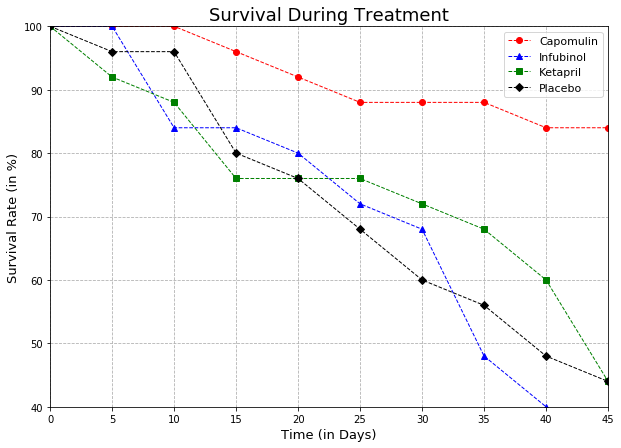

<Figure size 432x288 with 0 Axes>

In [53]:
# Generate the Plot (Accounting for percentages)

plt.figure(figsize=(10,7))

cap3 = plt.errorbar(x_axis, (mouse_dataframe["Capomulin"]/25*100), 
                     fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color="red")
infu3 = plt.errorbar(x_axis, (mouse_dataframe["Infubinol"]/25*100), 
                      fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color="blue")
keta3 = plt.errorbar(x_axis, (mouse_dataframe["Ketapril"]/25*100), 
                      fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color="green")
plac3 = plt.errorbar(x_axis, (mouse_dataframe["Placebo"]/25*100),  
                      fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color="black")

plt.ylim(40, 100)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=18)
plt.xlabel("Time (in Days)", fontsize=13)
plt.ylabel("Survival Rate (in %)", fontsize=13)

plt.grid(linestyle="dashed")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol",
                                          "Ketapril", "Placebo"), fontsize=11)
plt.show()
   
plt.savefig("fig3.jpg")




## Summary Bar Graph

In [32]:
# Calculate the percent changes for each drug

capchange = ((tumor_plot_dataframe["Capomulin"][45] - tumor_plot_dataframe["Capomulin"][0])/45)*100
ceftchange = ((tumor_plot_dataframe["Ceftamin"][45] - tumor_plot_dataframe["Ceftamin"][0])/45)*100
infuchange = ((tumor_plot_dataframe["Infubinol"][45] - tumor_plot_dataframe["Infubinol"][0])/45)*100
ketachange = ((tumor_plot_dataframe["Ketapril"][45] - tumor_plot_dataframe["Ketapril"][0])/45)*100
naftchange = ((tumor_plot_dataframe["Naftisol"][45] - tumor_plot_dataframe["Naftisol"][0])/45)*100
placchange = ((tumor_plot_dataframe["Placebo"][45] - tumor_plot_dataframe["Placebo"][0])/45)*100
propchange = ((tumor_plot_dataframe["Propriva"][45] - tumor_plot_dataframe["Propriva"][0])/45)*100
ramichange = ((tumor_plot_dataframe["Ramicane"][45] - tumor_plot_dataframe["Ramicane"][0])/45)*100
stelchange = ((tumor_plot_dataframe["Stelasyn"][45] - tumor_plot_dataframe["Stelasyn"][0])/45)*100
zonichange = ((tumor_plot_dataframe["Zoniferol"][45] - tumor_plot_dataframe["Zoniferol"][0])/45)*100

drug_change_dataframe = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo"],
                              "Percent Change": [capchange, infuchange, ketachange, placchange]
                              })
drug_change_dataframe

# Display the data to confirm  



,Drug,Percent Change
0,Capomulin,2.719950
1,Infubinol,2.543172
2,Ketapril,3.229303
3,Placebo,3.003835


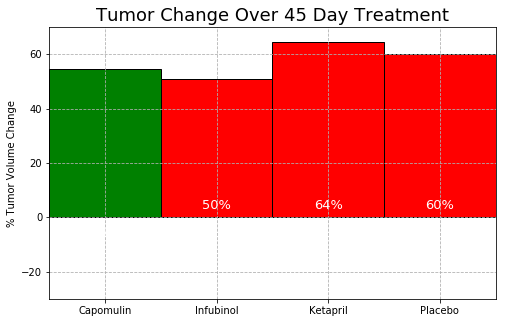

<Figure size 432x288 with 0 Axes>

In [33]:
# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figurex_axis=np.arange(0,4,1)

plt.figure(figsize=(8,5))
    
rects1 = plt.bar(0, (drug_change_dataframe["Percent Change"][0])*20, color='g', alpha=1, align="edge",
                 ec="black", width=1)
rects2 = plt.bar(1, (drug_change_dataframe["Percent Change"][1])*20, color='r', alpha=1, align="edge",
                 ec="black", width=1)
rects3 = plt.bar(2, (drug_change_dataframe["Percent Change"][2])*20, color='r', alpha=1, align="edge",
                 ec="black", width=1)
rects4 = plt.bar(3, (drug_change_dataframe["Percent Change"][3])*20, color='r', alpha=1, align="edge",
                 ec="black", width=1)
tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, drug_change_dataframe["Drug"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=18)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=13)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
               ha='center', va='bottom', color='white', fontsize=13)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

plt.savefig("summary bar graph.png")
